## IMPORT LIBRARIES

In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import glob
plt.rcParams["figure.figsize"] = (20, 8)

## PLOT FONT DETAILS

In [2]:
SMALL_SIZE = 15
MEDIUM_SIZE = 20
BIGGER_SIZE = 25

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

## NUMBER OF ELEMENTS SIMULATED AND THEIR AREA

In [3]:
nels = [8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768]

Area = 8*4

el_A = Area/np.array(nels)

## STRESS-STRAIN RESULTS (ELEMENT 1 ONLY)

In [4]:
# number of data files to read
files = (glob.glob('Element_1_data/*.csv')) 
nfiles = len(files) 


# store data from all runs in individual datasets 
el1_eps11_data = []
el1_eps22_data = []
el1_gam12_data = []

el1_sig11_data = []
el1_sig22_data = []
el1_sig12_data = []

# read and sort data

for i in range(nfiles):
    el1 = pandas.read_csv('Element_1_data/el1_shape_'+str(i)+'.csv')
    
    el1_eps11 = el1['eps_11'][0]
    el1_eps22 = el1['eps_22'][0]
    el1_gam12 = el1['gam_12'][0]
    
    el1_eps11_data.append(el1_eps11)
    el1_eps22_data.append(el1_eps22)
    el1_gam12_data.append(el1_gam12)
    
    el1_sig11 = el1['sig_11'][0]
    el1_sig22 = el1['sig_22'][0]
    el1_sig12 = el1['sig_12'][0]
    
    el1_sig11_data.append(el1_sig11)
    el1_sig22_data.append(el1_sig22)
    el1_sig12_data.append(el1_sig12)
    
# vectorise in voigt notation
    
eps_el1 = np.zeros((nfiles, 3))
sig_el1 = np.zeros((nfiles, 3))

for i in range(nfiles):
    
    eps_el1[i, 0] = el1_eps11_data[i]
    eps_el1[i, 1] = el1_eps22_data[i]
    eps_el1[i, 2] = el1_gam12_data[i]
    
    sig_el1[i, 0] = el1_sig11_data[i]
    sig_el1[i, 1] = el1_sig22_data[i]
    sig_el1[i, 2] = el1_sig12_data[i]

    
eps_el1 = np.abs(eps_el1)
sig_el1 = np.abs(sig_el1)        

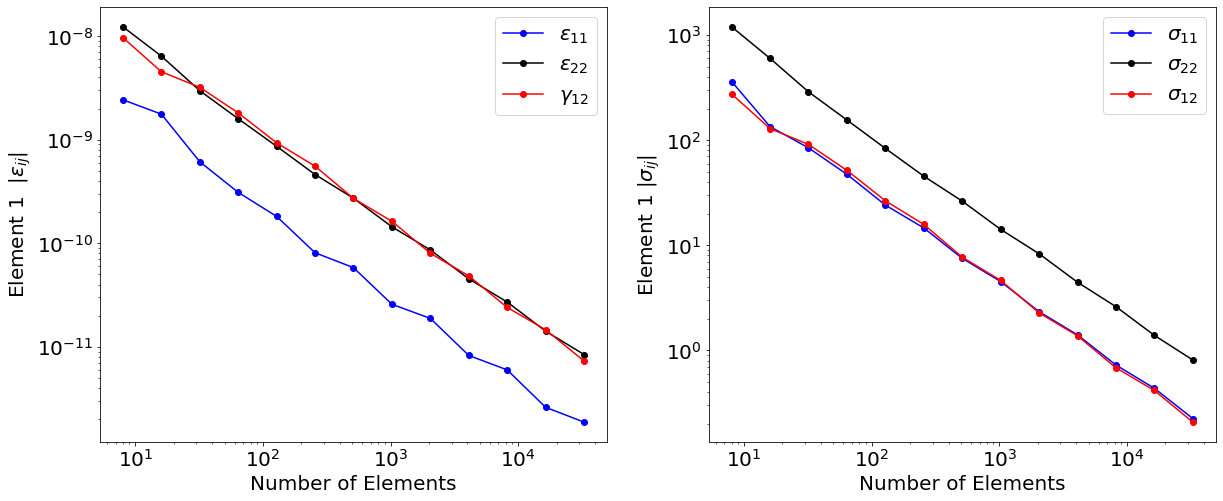

In [5]:
# plot

ax1 = plt.subplot(1,2,1)
ax1.loglog(nels, np.abs(el1_eps11_data), '-o', color = 'blue', label = r'$\epsilon_{11}$')
ax1.plot(nels,np.abs(el1_eps22_data), '-o', color = 'black', label = r'$\epsilon_{22}$')
ax1.plot(nels,np.abs(el1_gam12_data), '-o', color = 'red', label = r'$\gamma_{12}$')
ax1.set_xlabel('Number of Elements')
ax1.set_ylabel('Element 1  $|\epsilon_{ij}|$')
ax1.legend()

ax2 = plt.subplot(1,2,2)
ax2.loglog(nels, np.abs(el1_sig11_data), '-o', color = 'blue', label = r'$\sigma_{11}$')
ax2.plot(nels,np.abs(el1_sig22_data), '-o', color = 'black', label = r'$\sigma_{22}$')
ax2.plot(nels,np.abs(el1_sig12_data), '-o', color = 'red', label = r'$\sigma_{12}$')
ax2.set_xlabel('Number of Elements')
ax2.set_ylabel('Element 1 $|\sigma_{ij}|$')
ax2.legend()

plt.savefig('Analysis_Figs/el1_stress_strain.png')

plt.show()

## STRESS-STRAIN RESULTS (MAX)

In [6]:
# number of data files to read

files = (glob.glob('max_strain_stress_data/*.csv'))
nfiles = len(files)

# store data from all runs in individual datasets 
max_eps11_data = []
nodes_eps11_data = []

max_eps22_data = []
nodes_eps22_data = []

max_gam12_data = []
nodes_gam12_data = []

max_sig11_data = []
nodes_sig11_data = []

max_sig22_data = []
nodes_sig22_data = []

max_sig12_data = []
nodes_sig12_data = []

# read and sort data

for i in range(nfiles):
    max_eps_sig = pandas.read_csv('max_strain_stress_data/max_strain_stress_data_shape_'+str(i)+'.csv')
    
    max_eps_sig_eps11 = max_eps_sig['eps_11'][0]
    max_eps_sig_eps22 = max_eps_sig['eps_22'][0]
    max_eps_sig_gam12 = max_eps_sig['gam_12'][0]
    
    max_eps11_data.append(max_eps_sig_eps11)
    max_eps22_data.append(max_eps_sig_eps22)
    max_gam12_data.append(max_eps_sig_gam12)
    
    max_eps_sig_sig11 = max_eps_sig['sig_11'][0]
    max_eps_sig_sig22 = max_eps_sig['sig_22'][0]
    max_eps_sig_sig12 = max_eps_sig['sig_12'][0]
    
    max_sig11_data.append(max_eps_sig_sig11)
    max_sig22_data.append(max_eps_sig_sig22)
    max_sig12_data.append(max_eps_sig_sig12)
    
    nodes_eps11 = max_eps_sig['eps_11'][1]
    nodes_eps22 = max_eps_sig['eps_22'][1]
    nodes_gam12 = max_eps_sig['gam_12'][1]
    
    nodes_eps11_data.append(nodes_eps11)
    nodes_eps22_data.append(nodes_eps22)
    nodes_gam12_data.append(nodes_gam12)
    
    nodes_sig11 = max_eps_sig['sig_11'][1]
    nodes_sig22 = max_eps_sig['sig_22'][1]
    nodes_sig12 = max_eps_sig['sig_12'][1]
    
    nodes_sig11_data.append(nodes_sig11)
    nodes_sig22_data.append(nodes_sig22)
    nodes_sig12_data.append(nodes_sig12)
    

# vectorise in voigt notation
    
eps_max = np.zeros((nfiles, 3))
sig_max = np.zeros((nfiles, 3))

for i in range(nfiles):
    
    eps_max[i, 0] = max_eps11_data[i]
    eps_max[i, 1] = max_eps22_data[i]
    eps_max[i, 2] = max_gam12_data[i]
    
    sig_max[i, 0] = max_sig11_data[i]
    sig_max[i, 1] = max_sig22_data[i]
    sig_max[i, 2] = max_sig12_data[i]



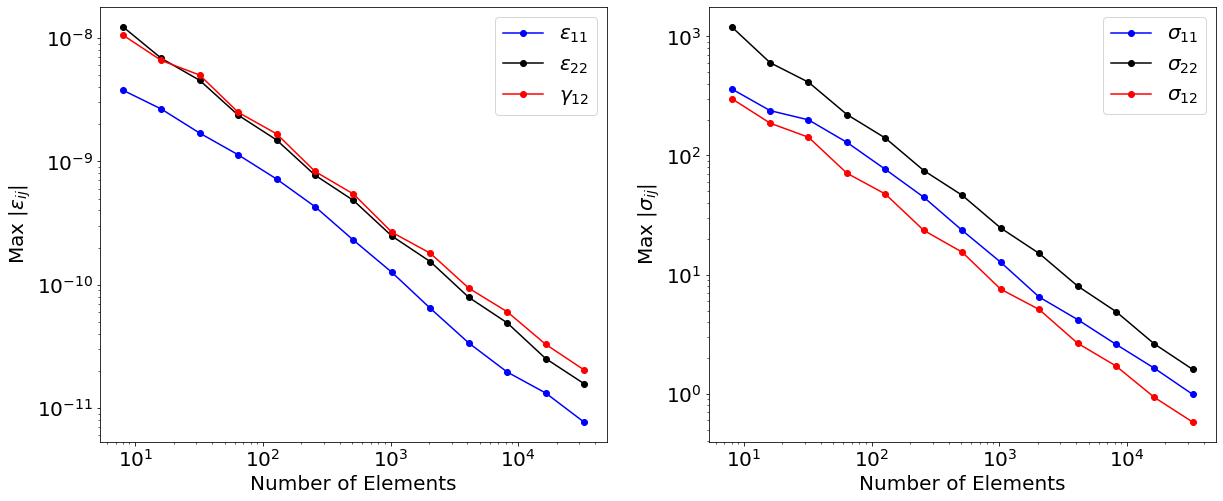

In [7]:
# plot

eps_max = np.abs(eps_max)
sig_max = np.abs(sig_max)

ax1 = plt.subplot(1,2,1)
ax1.loglog(nels, np.abs(max_eps11_data), '-o', color = 'blue', label = r'$\epsilon_{11}$')
ax1.plot(nels,np.abs(max_eps22_data), '-o', color = 'black', label = r'$\epsilon_{22}$')
ax1.plot(nels,np.abs(max_gam12_data), '-o', color = 'red', label = r'$\gamma_{12}$')
ax1.set_xlabel('Number of Elements')
ax1.set_ylabel('Max $|\epsilon_{ij}|$')
ax1.legend()

ax2 = plt.subplot(1,2,2)
ax2.loglog(nels, np.abs(max_sig11_data), '-o', color = 'blue', label = r'$\sigma_{11}$')
ax2.plot(nels,np.abs(max_sig22_data), '-o', color = 'black', label = r'$\sigma_{22}$')
ax2.plot(nels,np.abs(max_sig12_data), '-o', color = 'red', label = r'$\sigma_{12}$')
ax2.set_xlabel('Number of Elements')
ax2.set_ylabel('Max $|\sigma_{ij}|$')
ax2.legend()
plt.savefig('Analysis_Figs/max_stress_strain.png')
plt.show()


## MAXIMUM NODAL DISPLACEMENT DATA

In [8]:
# number of data files to read

files = (glob.glob('max_disp_data/*.csv'))
nfiles = len(files) 

# store data from all runs in individual datasets 
max_x1_data = []
nodes_x1_data = []

max_x2_data = []
nodes_x2_data = []

max_mag_data = []
nodes_mag_data = []

# read and sort data

for i in range(nfiles):
    max_disp = pandas.read_csv('max_disp_data/max_disp_data_shape_'+str(i)+'.csv')
    
    max_x1 = max_disp['d_x1'][0]
    max_x2 = max_disp['d_x2'][0]
    max_mag = max_disp['d_x'][0]
    
    max_x1_data.append(max_x1)
    max_x2_data.append(max_x2)
    max_mag_data.append(max_mag)

    nodes_x1 = max_disp['d_x1'][1]
    nodes_x2 = max_disp['d_x2'][1]
    nodes_mag = max_disp['d_x'][1]
    
    nodes_x1_data.append(nodes_x1)
    nodes_x2_data.append(nodes_x2)
    nodes_mag_data.append(nodes_mag)

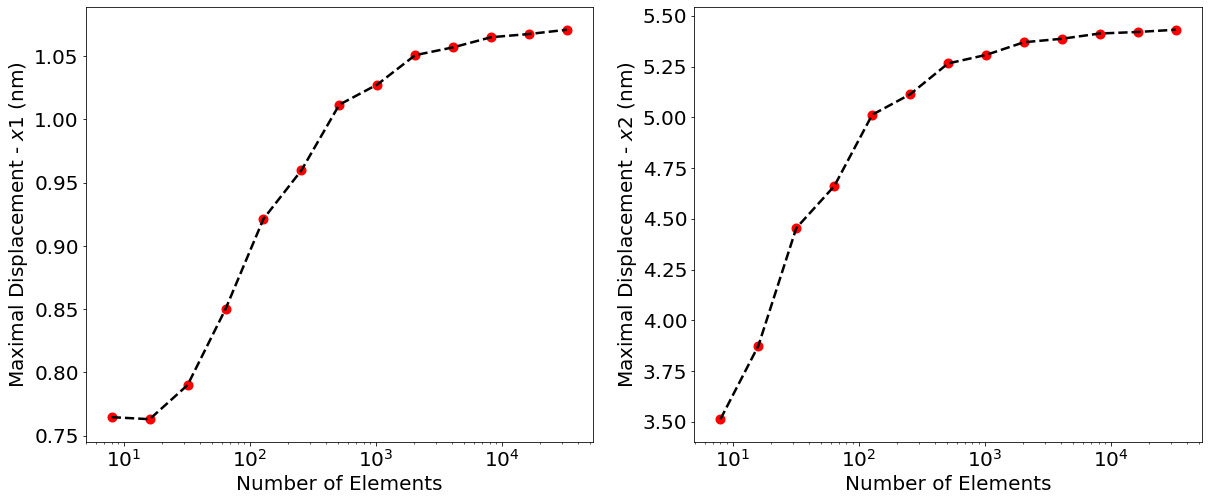

In [9]:
# plot

ax1 = plt.subplot(1,2,1)
ax1.semilogx(nels , np.abs(max_x1_data)*1e9, '--', linewidth  = 2.5, color = 'black')
ax1.scatter(nels , np.abs(max_x1_data)*1e9, linewidth  = 4, color = 'red')
ax1.set_xlabel(r'Number of Elements')
ax1.set_ylabel(r'Maximal Displacement - $x1$ (nm)')

ax2 = plt.subplot(1,2,2)
ax2.semilogx(nels , np.abs(max_x2_data)*1e9, '--', linewidth  = 2.5, color = 'black')
ax2.scatter(nels , np.abs(max_x2_data)*1e9, linewidth  = 4, color = 'red')
ax2.set_xlabel(r'Number of Elements')
ax2.set_ylabel(r'Maximal Displacement - $x2$ (nm)')

plt.savefig('Analysis_Figs/max_disp.png')

plt.show()

In [10]:
# number of data files to read

files = (glob.glob('force_data/*.csv'))
nfiles = len(files)

# store data from all runs in individual datasets 
r1_data = []
r2_data = []

r1_max_data = []
r2_max_data = []

mag_r_data = []

angle_1_data = []
angle_2_data = []

# read and sort data

for i in range(nfiles):
    force_dat = pandas.read_csv('force_data/force_'+str(i)+'.csv')
    
    r1 = force_dat['r1'][0]
    r2 = force_dat['r2'][0]
    r1_max = force_dat['r1_max'][0]
    r2_max = force_dat['r2_max'][0]

    mag_r = force_dat['mag_r'][0]
    angle_1 = force_dat['angle_1'][0]
    angle_2 = force_dat['angle_2'][0]
    
    r1_data.append(r1)
    r2_data.append(r2)
    r1_max_data.append(r1_max)
    r2_max_data.append(r2_max)
    mag_r_data.append(mag_r)
    angle_1_data.append(angle_1)
    angle_2_data.append(angle_2)

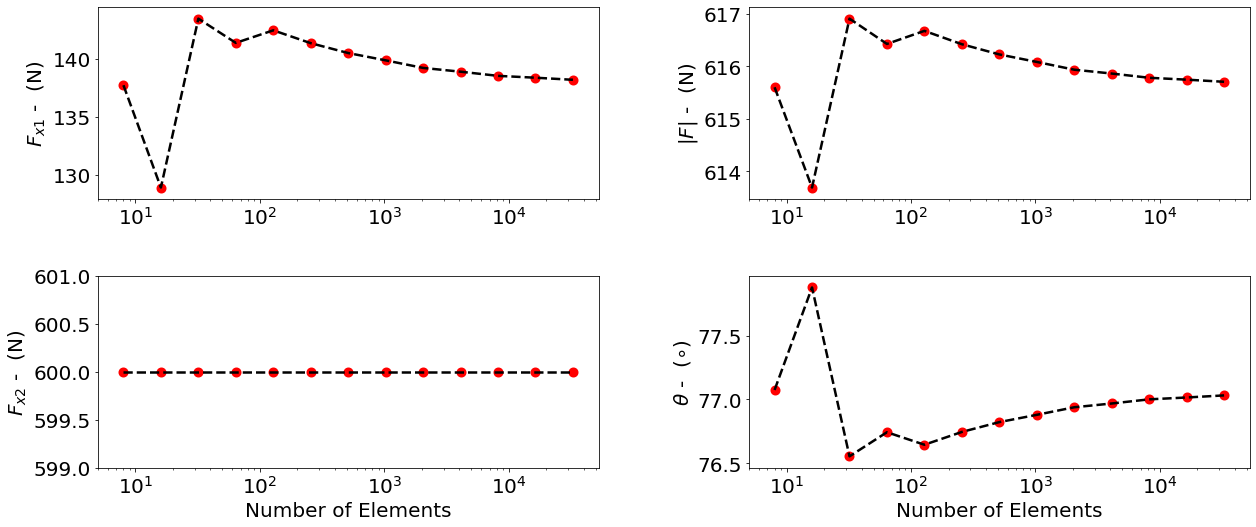

In [11]:
# plot

ax1 = plt.subplot(2,2,1)
ax1.semilogx(nels , np.abs(r1_data), '--', linewidth  = 2.5, color = 'black')
ax1.scatter(nels , np.abs(r1_data), linewidth  = 4, color = 'red')

ax1.set_ylabel(r'$F_{x1}$ -  (N)')

ax3 = plt.subplot(2,2,3)
ax3.semilogx(nels , np.abs(r2_data), '--', linewidth  = 2.5, color = 'black')
ax3.scatter(nels , np.abs(r2_data), linewidth  = 4, color = 'red')
ax3.set_xlabel(r'Number of Elements')
ax3.set_ylabel(r'$F_{x2}$ -  (N)')
ax3.set_ylim(599, 601)

ax2 = plt.subplot(2,2,2)
ax2.semilogx(nels , np.abs(mag_r_data), '--', linewidth  = 2.5, color = 'black')
ax2.scatter(nels , np.abs(mag_r_data), linewidth  = 4, color = 'red')

ax2.set_ylabel(r'$|F|$ -  (N)')

ax4 = plt.subplot(2,2,4)
ax4.semilogx(nels , angle_2_data, '--', linewidth  = 2.5, color = 'black')
ax4.scatter(nels , angle_2_data, linewidth  = 4, color = 'red')
ax4.set_xlabel(r'Number of Elements')
ax4.set_ylabel(r'$\theta$ -  ($\circ$)')

plt.savefig('Analysis_Figs/reaction.png')

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.4)

plt.show()

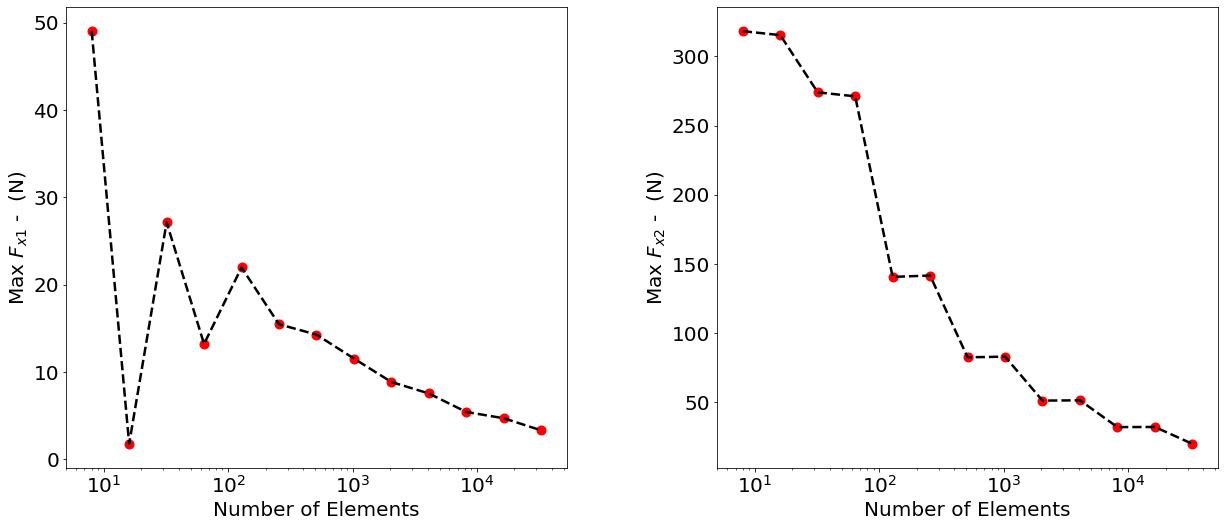

In [12]:
# plot

ax2 = plt.subplot(1,2,1)
ax2.semilogx(nels , np.abs(r1_max_data), '--', linewidth  = 2.5, color = 'black')
ax2.scatter(nels ,  np.abs(r1_max_data), linewidth  = 4, color = 'red')
ax2.set_xlabel(r'Number of Elements')
ax2.set_ylabel(r'Max $F_{x1}$ -  (N)')

ax4 = plt.subplot(1,2,2)
ax4.semilogx(nels , np.abs(r2_max_data), '--', linewidth  = 2.5, color = 'black')
ax4.scatter(nels , np.abs(r2_max_data), linewidth  = 4, color = 'red')
ax4.set_xlabel(r'Number of Elements')
ax4.set_ylabel(r'Max $F_{x2}$ -  (N)')

plt.savefig('Analysis_Figs/reaction_max.png')

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.4)

plt.show()


## BAYESIAN REGRESSION FOR ATTEMPTED FITS BELOW 

In [13]:
class PolynomialBasis:
    """
    A set of polynomial basis functions.
    
    Arguments:
    degree  -  The degree of the polynomial.
    """
    def __init__(self, degree):
        self.degree = degree
        self.num_basis = degree + 1
    def __call__(self, x):
        return np.array([x[0] ** (i+1) for i in range(self.degree + 1)])
    

    
class PolynomialBasis_half:
    """
    A set of polynomial basis functions.
    
    Arguments:
    degree  -  The degree of the polynomial.
    """
    def __init__(self, degree):
        self.degree = degree
        self.num_basis = degree + 1
    def __call__(self, x):
        return np.array([x[0] ** (i+1)/2 for i in range(self.degree + 1)])
    
    
class LinearBasis:
    """
    Represents a 1D linear basis.
    """
    def __init__(self):
        self.num_basis = 2 # The number of basis functions
        
    def __call__(self, x):
        """
        ``x`` should be a 1D array of inputs
        """
        return [x[0]]

In [14]:
# bayesian regression statistics - taken from PX914 lectures- Authour Dr. James Kermode
from sklearn.linear_model import BayesianRidge

def design_matrix(X, phi):
    """
    Arguments:
    
    X   -  The observed inputs
    phi -  The basis functions
    """
    num_observations = X.shape[0]
    num_basis = phi.num_basis
    Phi = np.zeros((num_observations, num_basis))
    for i in range(num_observations):
        Phi[i, :] = phi(X[i, :])
    return Phi

def posterior(Phi, y, alpha, beta, return_inverse=False):
    """Computes mean and covariance matrix of the posterior distribution."""
    S_N_inv = alpha * np.eye(Phi.shape[1]) + beta * Phi.T.dot(Phi)
    S_N = np.linalg.inv(S_N_inv)
    m_N = beta * S_N.dot(Phi.T).dot(y)
    m_N = m_N
    if return_inverse:
        return m_N, S_N, S_N_inv
    else:
        return m_N, S_N
    
def posterior_predictive(Phi_test, m_N, S_N, beta):
    """Computes mean and variances of the posterior predictive distribution."""
    y = Phi_test.dot(m_N).ravel()
    # Only compute variances (diagonal elements of covariance matrix)
    y_epi = np.sum(Phi_test.dot(S_N) * Phi_test, axis=1)
    y_var = 1/beta + y_epi   
    return y, y_epi, y_var
    

In [15]:
def  Bayesian_plotter(phi, data_X, data_Y, ax, posterior_data = False, log = True):
    
    """Takes in defined basis set, test X and Y data and performs and plots bayesian regression"""
    
    # regression domain
    X_p = np.linspace(0.0001, max(data_X), len(data_X))[:, None]
    
    # test data
    X = data_X[:, None]
    Y = data_Y[:, None]
    
    # set up design matrix for given basis set
    Phi = design_matrix(X, phi)
    
    # optimal log liklihood parameters
    reg = BayesianRidge()
    reg.fit(Phi,Y.ravel())
    
    beta = reg.alpha_
    alpha = reg.lambda_

    # posterior distribution data
    mN, SN = posterior(Phi, Y, alpha, beta)
    if posterior_data:
        return mN, SN
    Phi_p = design_matrix(X_p, phi)
    Y_p, V_ep, V_p = posterior_predictive(Phi_p, mN, SN, beta)
    S_p_ep = np.sqrt(V_ep)
    S_p = np.sqrt(V_p)
    Y_l_ep = Y_p - 2*S_p_ep  # Lower epistemic predictive bound
    Y_u_ep = Y_p + 2*S_p_ep  # Upper epistemic predictive bound
    Y_l = Y_p - 2*S_p # Lower predictive bound
    Y_u = Y_p + 2*S_p # Upper predictive bound
    
    
    # plot
    if log:
        ax.loglog(data_X, data_Y, 'o', label='Data', color = 'blue')
        ax.loglog(X_p, Y_p, lw=3, label='Bayesian Prediction', color = 'C1')
    else:
        ax.scatter(data_X, data_Y, s = 40, label='Observations', color = 'blue')
        ax.plot(X_p, Y_p, lw=3, label='Bayesian Prediction', color = 'C1')
    ax.fill_between(X_p.flatten(), Y_l_ep, Y_u_ep, color='C2', alpha=0.25, label='Epistemic uncertainty')
    ax.fill_between(X_p.flatten(), Y_l, Y_l_ep, color='C1', alpha=0.25, label='Total uncertainty')
    ax.fill_between(X_p.flatten(), Y_u_ep, Y_u, color='C1', alpha=0.25)
    ax.legend()
    ax.set_xlim(1e-3, 1e1)
    ax.set_ylim(0.9*np.amin(data_Y), 1.1*np.amax(data_Y))
    

    return 

## DISCRETIZATION ERROR 

$$
||\bar{e}||_{L_2} = \frac{||\mathbf{u^{h}} - \mathbf{u^{ex}} ||_{L_2}}{||\mathbf{u^{ex}}||_{L_2}} = \left(\frac{\sum_{i = 1}^{n}|u_i^h - u_i^{ex}|^2}{\sum_{i = 1}^{n}|u_i^{ex}|^2}\right)^{\frac{1}{2}}
$$

In [16]:
def error(vec, norm_vec):
    
    """
    Function - Estiamtes normalised discretization error (L2 norm).
    
    Input - vec = array represnting stress/strain vector e.g [eps11, eps22, gam12]
          - norm_vec = array represnting analytic/ assumed correct result, same form as vec

    Output - er = number represnting the L2 discretization error.
    """
    
    er = np.abs(np.array(vec) - np.array(norm_vec))
    er = np.linalg.norm(er)
    
    norm = np.linalg.norm(norm_vec)
    
    er = er/norm
    
    return er
    

In [17]:
# error - element 1 data
error_eps = np.zeros((nfiles-1))
error_sig = np.zeros((nfiles-1))

# error - max data
error_eps_max = np.zeros((nfiles-1))
error_sig_max = np.zeros((nfiles-1))

for i in range(nfiles-1):
    
    error_eps[i] = error(eps_el1[i,:], eps_el1[-1,:])
    error_sig[i] = error(sig_el1[i,:], sig_el1[-1,:])
    
    error_eps_max[i] = error(eps_max[i,:], eps_max[-1,:])
    error_sig_max[i] = error(sig_max[i,:], sig_max[-1,:])


Text(0.5, 0, 'Element Area - $A$')

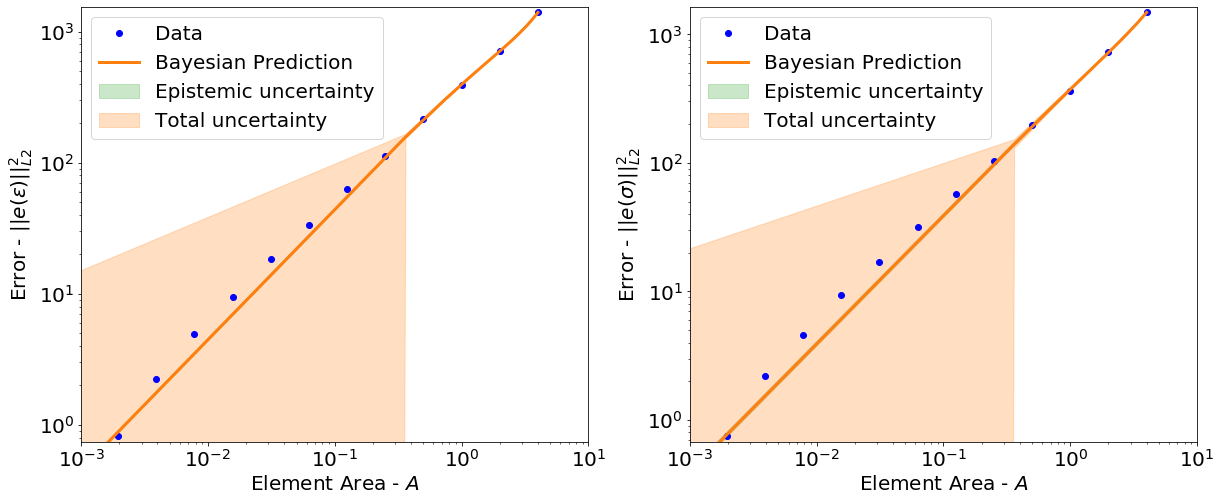

In [18]:
# bayesian regression fit

# use polynomial basis of form (a1*x + a2*x**2 + a3*x**3)
phi = PolynomialBasis(degree = 2)


# plot
ax1 = plt.subplot(1,2,1)

Bayesian_plotter(phi, np.array(el_A[:-1]), error_eps, ax1, posterior_data = False, log = True)
ax1.set_ylabel(r'Error - $|| e(\epsilon) ||^{2}_{L2}$')
ax1.set_xlabel(r'Element Area - $A$')



ax2 = plt.subplot(1,2,2)

Bayesian_plotter(phi, el_A[:-1], error_sig, ax2, posterior_data = False, log = True)
ax2.set_ylabel(r'Error - $||e(\sigma)||^{2}_{L2}$')
ax2.set_xlabel(r'Element Area - $A$')



# plt.savefig('Analysis_Figs/bay_error_full.png')
# plt.savefig('Analysis_Figs/bay_error.png')
# plt.savefig('Analysis_Figs/error.png')

In [19]:
# posterior distribution data
eps, er_e = Bayesian_plotter(phi, el_A[:-1], error_eps, ax1, posterior_data = True, log = True)

sig, er_s = Bayesian_plotter(phi, el_A[:-1], error_sig, ax1, posterior_data = True, log = True)


# print coefficients of above bayesian fit (a1*x + a2*x**2 + a3*x**3)

label = ['a1', 'a2', 'a3']

print('STRAIN FIT:')
for e,l in zip(eps, label):
    print(l, e)
print('----------------')

print('STRESS FIT:')
for s,l in zip(sig, label):
    print(l, s)
print('----------------')

STRAIN FIT:
a1 [461.72120726]
a2 [-79.12446174]
a3 [12.82413382]
----------------
STRESS FIT:
a1 [396.42433002]
a2 [-29.35879847]
a3 [5.70161679]
----------------
